# Lista 2 - Ecologia
# Aluno: João Vitor Mendes da Costa Tinti  
# TP2

## Importando as bibliotecas necessárias para o processamento dos dados

In [20]:
import pandas as pd
import numpy as np
import math

# Os dados foram digitalizados em uma planilha de excel 
## A planilha foi importada do excel para este arquivo para fins de processamento

In [21]:
dados = pd.read_excel('C:/Users/joaovitor/Desktop/Python/ecologia2.xlsx')

## Visualizando parte dos dados que foram importados do excel

In [22]:
dados.head()

,A.hispidum,A.hisp MS,A.ficoidea,A.fico MS,L.purpurea,L.purp MS,E.indica,E.indi MS,C.echinatus,C.echi MS,P.oleracea,P.olero MS,R.pilosa,R.pilo MS,P.maximum,P.maxi MS
0,6,33,3,195,1,26,3,63,6,114,4,40,3,96,4,420
1,8,50,2,162,0,0,4,80,8,168,3,33,8,216,0,0
2,2,14,5,390,0,0,5,80,8,128,3,27,5,115,0,0
3,1,7,1,85,2,48,2,28,7,77,8,40,1,29,1,136
4,0,0,0,0,3,60,1,13,4,76,6,24,1,230,1,148


## Exibindo algumas estatística como média, desvio padrão, quantis etc

In [23]:
round(dados.describe(),2)

,A.hispidum,A.hisp MS,A.ficoidea,A.fico MS,L.purpurea,L.purp MS,E.indica,E.indi MS,C.echinatus,C.echi MS,P.oleracea,P.olero MS,R.pilosa,R.pilo MS,P.maximum,P.maxi MS
count,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00
mean,3.27,20.47,3.53,257.40,1.27,31.13,2.73,49.27,2.27,39.60,2.73,20.27,1.67,59.67,0.67,89.67
std,3.31,20.16,4.60,322.22,1.58,37.59,1.71,25.24,3.31,57.79,2.09,11.60,2.50,82.18,1.11,134.26
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,13.00,0.00,0.00,1.00,7.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,1.00,24.50,0.00,0.00,1.00,9.50,0.00,0.00,0.00,0.00
50%,2.00,14.00,2.00,162.00,1.00,26.00,2.00,47.00,0.00,0.00,2.00,20.00,0.00,0.00,0.00,0.00
75%,6.00,36.50,4.50,355.00,1.50,39.00,4.00,70.50,5.00,76.50,3.50,27.50,2.50,105.50,1.00,142.00
max,9.00,55.00,15.00,1053.00,5.00,112.00,6.00,88.00,8.00,168.00,8.00,40.00,8.00,230.00,4.00,420.00


## Isolando apenas as colunas com o número de amostras por espécie

In [24]:
dados_N = dados.loc[:,::2]
dados_N.head(5)

,A.hispidum,A.ficoidea,L.purpurea,E.indica,C.echinatus,P.oleracea,R.pilosa,P.maximum
0,6,3,1,3,6,4,3,4
1,8,2,0,4,8,3,8,0
2,2,5,0,5,8,3,5,0
3,1,1,2,2,7,8,1,1
4,0,0,3,1,4,6,1,1


## Criando a tabela com as colunas solicitadas pelo exercício para cada espécie vegetal

In [25]:
tabela = {'Espécies':dados_N.columns,
          'Variância':round((dados_N.std())**2,2),
          'Média':round(dados_N.mean(),2)}

## As colunas "Espécies", "Variância" e "Média" foram adicionadas a tabela recém criada

In [26]:
tabela = pd.DataFrame(tabela)
tabela

,Espécies,Variância,Média
A.hispidum,A.hispidum,10.92,3.27
A.ficoidea,A.ficoidea,21.12,3.53
L.purpurea,L.purpurea,2.50,1.27
E.indica,E.indica,2.92,2.73
C.echinatus,C.echinatus,10.92,2.27
P.oleracea,P.oleracea,4.35,2.73
R.pilosa,R.pilosa,6.24,1.67
P.maximum,P.maximum,1.24,0.67


## Criando a coluna "Distribuição" 

In [27]:
distribuicao = []
for v, m in zip(tabela['Variância'], tabela['Média']):
    if v == 0:
        distribuicao.append('Uniforme')
    if v <= m:
        distribuicao.append('Acaso')
    if v > m:
        distribuicao.append('Agregada')
tabela['Distribuição'] = distribuicao
tabela

,Espécies,Variância,Média,Distribuição
A.hispidum,A.hispidum,10.92,3.27,Agregada
A.ficoidea,A.ficoidea,21.12,3.53,Agregada
L.purpurea,L.purpurea,2.50,1.27,Agregada
E.indica,E.indica,2.92,2.73,Agregada
C.echinatus,C.echinatus,10.92,2.27,Agregada
P.oleracea,P.oleracea,4.35,2.73,Agregada
R.pilosa,R.pilosa,6.24,1.67,Agregada
P.maximum,P.maximum,1.24,0.67,Agregada


## Criando a coluna "Grau Contagiosidade"

In [28]:
gc = []
for v, m in zip(tabela['Variância'], tabela['Média']):
    gc.append(round(v/m,2))
tabela['Grau Contagiosidade'] = gc
tabela

,Espécies,Variância,Média,Distribuição,Grau Contagiosidade
A.hispidum,A.hispidum,10.92,3.27,Agregada,3.34
A.ficoidea,A.ficoidea,21.12,3.53,Agregada,5.98
L.purpurea,L.purpurea,2.50,1.27,Agregada,1.97
E.indica,E.indica,2.92,2.73,Agregada,1.07
C.echinatus,C.echinatus,10.92,2.27,Agregada,4.81
P.oleracea,P.oleracea,4.35,2.73,Agregada,1.59
R.pilosa,R.pilosa,6.24,1.67,Agregada,3.74
P.maximum,P.maximum,1.24,0.67,Agregada,1.85


## Criando a coluna "Densidade plantas/ha"

In [29]:
somatorio = [c for c in dados_N.sum()]
somatorio = [(c*10000)/7.5 for c in somatorio]
#O 7.5 é resultado da multiplicação 15 amostras * 0.5 m^2
densidade = [math.ceil(round(c,2)) for c in somatorio]
tabela['Densidade plantas/ha'] = densidade
tabela

,Espécies,Variância,Média,Distribuição,Grau Contagiosidade,Densidade plantas/ha
A.hispidum,A.hispidum,10.92,3.27,Agregada,3.34,65334
A.ficoidea,A.ficoidea,21.12,3.53,Agregada,5.98,70667
L.purpurea,L.purpurea,2.50,1.27,Agregada,1.97,25334
E.indica,E.indica,2.92,2.73,Agregada,1.07,54667
C.echinatus,C.echinatus,10.92,2.27,Agregada,4.81,45334
P.oleracea,P.oleracea,4.35,2.73,Agregada,1.59,54667
R.pilosa,R.pilosa,6.24,1.67,Agregada,3.74,33334
P.maximum,P.maximum,1.24,0.67,Agregada,1.85,13334


## Criando a coluna "Densidade Relativa %"

In [30]:
densidade_relativa = []
for c in tabela['Densidade plantas/ha']:
    densidade_relativa.append(c/tabela['Densidade plantas/ha'].sum())
densidade_relativa = [round(100*c,2) for c in densidade_relativa]
tabela['Densidade Relativa %'] = densidade_relativa
tabela

,Espécies,Variância,Média,Distribuição,Grau Contagiosidade,Densidade plantas/ha,Densidade Relativa %
A.hispidum,A.hispidum,10.92,3.27,Agregada,3.34,65334,18.01
A.ficoidea,A.ficoidea,21.12,3.53,Agregada,5.98,70667,19.49
L.purpurea,L.purpurea,2.50,1.27,Agregada,1.97,25334,6.99
E.indica,E.indica,2.92,2.73,Agregada,1.07,54667,15.07
C.echinatus,C.echinatus,10.92,2.27,Agregada,4.81,45334,12.50
P.oleracea,P.oleracea,4.35,2.73,Agregada,1.59,54667,15.07
R.pilosa,R.pilosa,6.24,1.67,Agregada,3.74,33334,9.19
P.maximum,P.maximum,1.24,0.67,Agregada,1.85,13334,3.68


## Criando a coluna "Frequência %"

In [31]:
colunas = [c for c in dados_N.columns]
frequencia = []
for c in range(0, len(colunas)):
    frequencia.append(sum(dados_N[colunas[c]] != 0)/dados_N.shape[0])
frequencia = [100*c for c in frequencia]
frequencia = [round(c,2) for c in frequencia]
tabela['Frequência %'] = frequencia
tabela

,Espécies,Variância,Média,Distribuição,Grau Contagiosidade,Densidade plantas/ha,Densidade Relativa %,Frequência %
A.hispidum,A.hispidum,10.92,3.27,Agregada,3.34,65334,18.01,66.67
A.ficoidea,A.ficoidea,21.12,3.53,Agregada,5.98,70667,19.49,66.67
L.purpurea,L.purpurea,2.50,1.27,Agregada,1.97,25334,6.99,60.00
E.indica,E.indica,2.92,2.73,Agregada,1.07,54667,15.07,100.00
C.echinatus,C.echinatus,10.92,2.27,Agregada,4.81,45334,12.50,40.00
P.oleracea,P.oleracea,4.35,2.73,Agregada,1.59,54667,15.07,100.00
R.pilosa,R.pilosa,6.24,1.67,Agregada,3.74,33334,9.19,46.67
P.maximum,P.maximum,1.24,0.67,Agregada,1.85,13334,3.68,40.00


## Criando a coluna "Frequência Relativa %"

In [32]:
frequencia_relativa = []
for c in tabela['Frequência %']:
    frequencia_relativa.append(c/tabela['Frequência %'].sum())
frequencia_relativa = [round(100*c,2) for c in frequencia_relativa]
tabela['Frequência Relativa %'] = frequencia_relativa
tabela

,Espécies,Variância,Média,Distribuição,Grau Contagiosidade,Densidade plantas/ha,Densidade Relativa %,Frequência %,Frequência Relativa %
A.hispidum,A.hispidum,10.92,3.27,Agregada,3.34,65334,18.01,66.67,12.82
A.ficoidea,A.ficoidea,21.12,3.53,Agregada,5.98,70667,19.49,66.67,12.82
L.purpurea,L.purpurea,2.50,1.27,Agregada,1.97,25334,6.99,60.00,11.54
E.indica,E.indica,2.92,2.73,Agregada,1.07,54667,15.07,100.00,19.23
C.echinatus,C.echinatus,10.92,2.27,Agregada,4.81,45334,12.50,40.00,7.69
P.oleracea,P.oleracea,4.35,2.73,Agregada,1.59,54667,15.07,100.00,19.23
R.pilosa,R.pilosa,6.24,1.67,Agregada,3.74,33334,9.19,46.67,8.97
P.maximum,P.maximum,1.24,0.67,Agregada,1.85,13334,3.68,40.00,7.69


## Criando a coluna "Dominância Relativa %"
## Precisamos isolar as colunas contendo os valores de MS para calcular a Dominância

In [33]:
dados = dados.loc[:,::-2]
dados = dados.loc[:,::-1]
dados.head()

,A.hisp MS,A.fico MS,L.purp MS,E.indi MS,C.echi MS,P.olero MS,R.pilo MS,P.maxi MS
0,33,195,26,63,114,40,96,420
1,50,162,0,80,168,33,216,0
2,14,390,0,80,128,27,115,0
3,7,85,48,28,77,40,29,136
4,0,0,60,13,76,24,230,148


In [34]:
dominancia_relativa = []
for c in dados.columns:
    dominancia_relativa.append(round(100*dados[c].sum()/dados.sum().sum(),2))
tabela['Dominância Relativa %'] = dominancia_relativa
tabela

,Espécies,Variância,Média,Distribuição,Grau Contagiosidade,Densidade plantas/ha,Densidade Relativa %,Frequência %,Frequência Relativa %,Dominância Relativa %
A.hispidum,A.hispidum,10.92,3.27,Agregada,3.34,65334,18.01,66.67,12.82,3.61
A.ficoidea,A.ficoidea,21.12,3.53,Agregada,5.98,70667,19.49,66.67,12.82,45.36
L.purpurea,L.purpurea,2.50,1.27,Agregada,1.97,25334,6.99,60.00,11.54,5.49
E.indica,E.indica,2.92,2.73,Agregada,1.07,54667,15.07,100.00,19.23,8.68
C.echinatus,C.echinatus,10.92,2.27,Agregada,4.81,45334,12.50,40.00,7.69,6.98
P.oleracea,P.oleracea,4.35,2.73,Agregada,1.59,54667,15.07,100.00,19.23,3.57
R.pilosa,R.pilosa,6.24,1.67,Agregada,3.74,33334,9.19,46.67,8.97,10.51
P.maximum,P.maximum,1.24,0.67,Agregada,1.85,13334,3.68,40.00,7.69,15.80


## Criando a coluna "I.V.I %", Índice de Valor de Importância
## O I.V.I é a soma da Densidade Relativa+Frequência Relativa+Dominância Relativa

In [35]:
ivi = []
for x,y,z in zip(tabela['Densidade Relativa %'], tabela['Frequência Relativa %'], tabela['Dominância Relativa %']):
    ivi.append(round(x+y+z, 2))
tabela['I.V.I %'] = ivi
tabela

,Espécies,Variância,Média,Distribuição,Grau Contagiosidade,Densidade plantas/ha,Densidade Relativa %,Frequência %,Frequência Relativa %,Dominância Relativa %,I.V.I %
A.hispidum,A.hispidum,10.92,3.27,Agregada,3.34,65334,18.01,66.67,12.82,3.61,34.44
A.ficoidea,A.ficoidea,21.12,3.53,Agregada,5.98,70667,19.49,66.67,12.82,45.36,77.67
L.purpurea,L.purpurea,2.50,1.27,Agregada,1.97,25334,6.99,60.00,11.54,5.49,24.02
E.indica,E.indica,2.92,2.73,Agregada,1.07,54667,15.07,100.00,19.23,8.68,42.98
C.echinatus,C.echinatus,10.92,2.27,Agregada,4.81,45334,12.50,40.00,7.69,6.98,27.17
P.oleracea,P.oleracea,4.35,2.73,Agregada,1.59,54667,15.07,100.00,19.23,3.57,37.87
R.pilosa,R.pilosa,6.24,1.67,Agregada,3.74,33334,9.19,46.67,8.97,10.51,28.67
P.maximum,P.maximum,1.24,0.67,Agregada,1.85,13334,3.68,40.00,7.69,15.80,27.17


## Criando a coluna "I.V.I Relativo %" 

In [36]:
ivi_relativo = [c/tabela['I.V.I %'].sum() for c in tabela['I.V.I %']]
ivi_relativo = [round(100*c,2) for c in ivi_relativo]
tabela['I.V.I Relativo %'] = ivi_relativo
tabela

,Espécies,Variância,Média,Distribuição,Grau Contagiosidade,Densidade plantas/ha,Densidade Relativa %,Frequência %,Frequência Relativa %,Dominância Relativa %,I.V.I %,I.V.I Relativo %
A.hispidum,A.hispidum,10.92,3.27,Agregada,3.34,65334,18.01,66.67,12.82,3.61,34.44,11.48
A.ficoidea,A.ficoidea,21.12,3.53,Agregada,5.98,70667,19.49,66.67,12.82,45.36,77.67,25.89
L.purpurea,L.purpurea,2.50,1.27,Agregada,1.97,25334,6.99,60.00,11.54,5.49,24.02,8.01
E.indica,E.indica,2.92,2.73,Agregada,1.07,54667,15.07,100.00,19.23,8.68,42.98,14.33
C.echinatus,C.echinatus,10.92,2.27,Agregada,4.81,45334,12.50,40.00,7.69,6.98,27.17,9.06
P.oleracea,P.oleracea,4.35,2.73,Agregada,1.59,54667,15.07,100.00,19.23,3.57,37.87,12.62
R.pilosa,R.pilosa,6.24,1.67,Agregada,3.74,33334,9.19,46.67,8.97,10.51,28.67,9.56
P.maximum,P.maximum,1.24,0.67,Agregada,1.85,13334,3.68,40.00,7.69,15.80,27.17,9.06


## Comparando os diferentes Índices de Valor de Importância Relativo das espécies vegetais

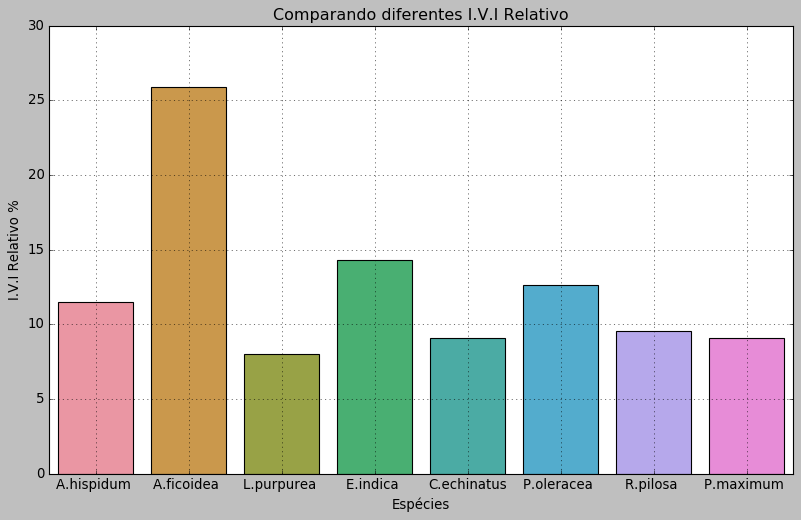

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.title('Comparando diferentes I.V.I Relativo')
plt.style.use('classic')
sns.barplot(x='Espécies', y='I.V.I Relativo %',data=tabela)
plt.grid(True)
plt.show()